In [2]:
import torch
from torch import atan
from torch.autograd import grad
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.misc import derivative

from sympy import *
import sympy as sp
from scipy.special import roots_legendre
from Func import *


In [3]:
x = symbols('x')
fx = -sin(pi*x)
fx

-sin(pi*x)

  (1, 0)	2.0
  (0, 0)	-4.0
  (2, 1)	2.0
  (1, 1)	-4.0
  (0, 1)	2.0
  (2, 2)	-4.0
  (1, 2)	2.0


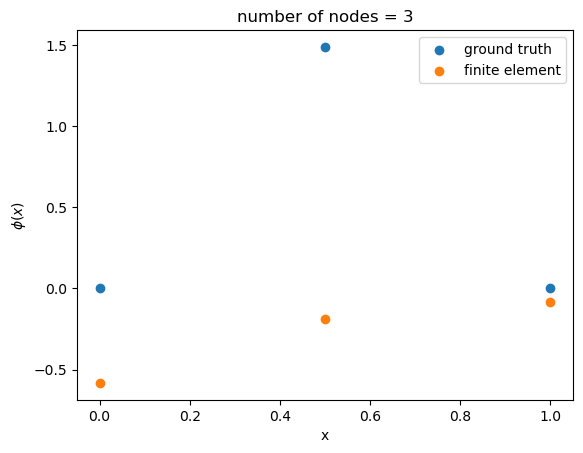

In [4]:
from scipy.sparse import dia_matrix
from scipy.sparse.linalg import inv
from numpy import pi

class FEM:
    def __init__(self, nodes, xmin=0, xmax=1):
        self.nodes = nodes
        x = np.linspace(xmin, xmax, nodes, dtype=float)
        self.x = x
        self.h = x[1] - x[0]
        self.a=50
        self.xb=0.2
        
    def Kmatrix(self):
        n = self.nodes
        m = 1/self.h * np.ones(n)
        data = [m, -2*m, m]
        offsets = [-1, 0, 1]
        # 使用 scipy.sparse 稀疏矩阵库，构造 3 对角稀疏矩阵 K
        K = dia_matrix((data, offsets), shape=(n, n)).tocsc()
        print(K)
        return K
    
    def bvec(self): # 在这里定义二阶导
        x=self.x
        a=self.a
        xb=self.xb
        B=x-xb
        '''假设 rho(x) 在每个单元内值为常数，仅对 u_j(x) 做积分'''
        #return - np.sin(pi * self.x) * self.h
        return -2*(a+a**3*B*(B-x+1))/(a**2*B**2+1)**2*self.h
        #return (1 - x) * (np.arctan(a * (x - xb)) + np.arctan(a*xb+np.zeros_like(x)))/self.h
        #return (x+1)*self.h




    def solve(self):
        K = self.Kmatrix()
        b = self.bvec()
        #print(type(b))
        return inv(K) * b
    
    def compare(self):
        x=self.x
        a=self.a
        xb=self.xb
        B=x-xb
        #ground_truth = 1/(pi**2) * np.sin(pi * self.x)
        #print(np.sinh(self.x))

        ground_truth =(1 - x) * (np.arctan(a * (x - xb)) + np.arctan(a*xb+np.zeros_like(x))) #这里是原函数
        #ground_truth =-2*(a+a**3*B*(B-x+1))/(a**2*B**2+1)**2
        #ground_truth =1/6*x*3
        
        fem_res = self.solve()
        
        plt.scatter(self.x, ground_truth, label="ground truth")
        plt.scatter(self.x, fem_res, label="finite element")
        plt.title("number of nodes = %s"%self.nodes)
        plt.xlabel("x")
        plt.ylabel(r"$\phi(x)$")
        plt.legend(loc='best')
        plt.show()


fem = FEM(3)
fem.compare()


(1 - x)*(atan(0.5*x - 0.4) + 0.380506377112365)
(1 - x)*(atan(50*x - 40.0) + 1.54580153317598)
0.5*(1 - x)/(0.25*(x - 0.8)**2 + 1) - atan(0.5*x - 0.4) - 0.380506377112365
0.43103448275862055
50*(1 - x)/(2500*(x - 0.8)**2 + 1) - atan(50*x - 40.0) - 1.54580153317598
0.03123048094940306


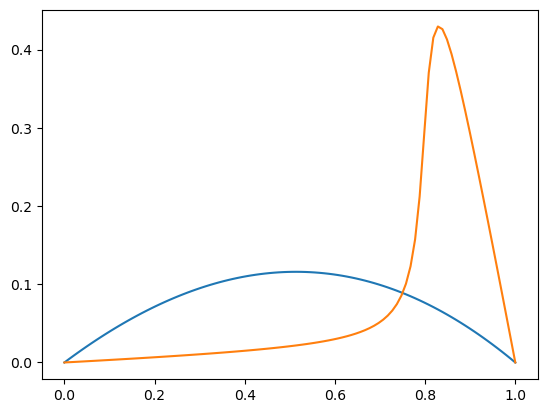

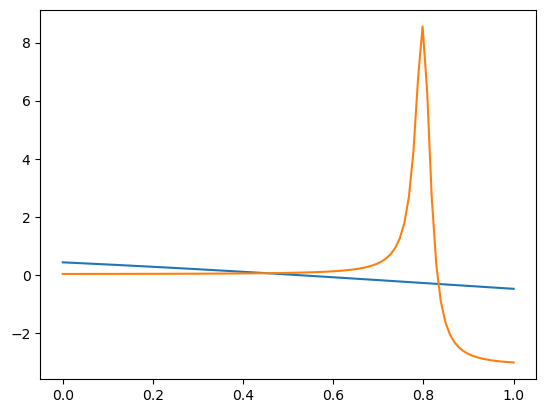

In [5]:
def f(x, a, xb=0.8):
    return (1 - x) * (sp.atan(a * (x - xb)) + sp.atan(a*xb))
def d2f(x, a, xb=0.8):
    b = x-xb
    return -2*(a+a**3*b*(b-x+1))/(a**2*b**2+1)*2

x = symbols('x')
x_data = np.linspace(0, 1, 100)
a = [0.5, 50]
xb = 0.8

for i in a:
    f_ = f(x, i)
    f_func = lambdify(x, f_)
    print(f_)
    #plt.figure()
    plt.plot(x_data, f_func(x_data))

plt.figure()
for i in a:
    df_ = diff(f(x, i), x)
    df_func = lambdify(x, df_)
    print(df_)

    plt.plot(x_data, df_func(x_data))
    print(df_func(0))

